In [1]:
import spacy.cli

spacy_download=spacy.cli.download('en_core_web_lg')

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
nlp=spacy.load('en_core_web_lg')

In [3]:
import pandas as pd

#load dataset to dataframe
df=pd.read_json('https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/14_word_vectors_spacy_text_classification/news_dataset.json')
df.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [4]:
#shape of the dataset
df.shape

(7500, 2)

In [5]:
df['category'].value_counts()

CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: category, dtype: int64

It can be seen that the dataset is balanced among the categories.

In [6]:
df['category_num']=df['category'].map({'BUSINESS':0,'SPORTS':1,'CRIME':2})

df.head()

,text,category,category_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,2
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,2
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,0


**Preprocess the text**

In [7]:
#remove stop words
#convert words to base form using lemmatization

#A function defined to preprocess the text
def preprocess(text):
  doc=nlp(text)
  filtered_tokens=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)
  return ' '.join(filtered_tokens)

In [8]:
df['preprocessed_text']=df['text'].apply(lambda text:preprocess(text))
df.head()

,text,category,category_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,2,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,2,woman Beats Cancer die fall horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,0,7 thing totally kill Weed Legalization Buzz


In [9]:
#get the spacy word embeddings for each preprocessed text
df['vector']=df['preprocessed_text'].apply(lambda text:nlp(text).vector)
df.head()

,text,category,category_num,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,2,Larry Nassar blame victim say victimize newly ...,"[-0.5585511, -0.29323253, -0.9253956, 0.189389..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,2,woman Beats Cancer die fall horse,"[-0.73039824, -0.43196002, -1.2930516, -1.0628..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...,"[-1.9413117, 0.121578515, -3.2996283, 1.511650..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-1.4702771, -0.685319, 0.57398, -0.31135806, ..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,0,7 thing totally kill Weed Legalization Buzz,"[-1.037173, -1.9495698, -1.7179357, 1.2975286,..."


In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.vector.values,df.category_num,test_size=0.2,random_state=2023)

In [11]:
x_train#it's like an array of array

array([array([ 1.07928336e+00,  1.10136330e+00, -1.27692115e+00,  1.15976894e+00,
               2.11605453e+00,  1.36624098e+00,  2.29735112e+00,  2.01146007e+00,
              -2.71166539e+00, -3.33997726e-01,  1.40830886e+00,  7.99461424e-01,
              -1.15553546e+00,  3.21777791e-01,  4.88785535e-01,  7.14997828e-01,
               1.46762788e+00, -1.18728447e+00, -7.34977722e-01,  8.90025556e-01,
              -7.01639771e-01,  6.32820070e-01, -1.85886681e+00, -1.70476985e+00,
               3.48351091e-01,  7.20745504e-01, -1.66872001e+00,  1.31423485e+00,
              -9.21822250e-01,  7.44864523e-01,  1.89584684e+00, -2.41922271e-02,
              -1.82392180e-01, -7.86460876e-01, -3.85504290e-02, -6.27248883e-01,
              -6.66426897e-01, -8.83767724e-01,  1.38866508e+00, -2.76953340e-01,
              -3.08575541e-01,  9.12147760e-01, -5.84895551e-01,  1.09117317e+00,
              -2.13397622e+00,  6.97453737e-01,  1.05978854e-01, -1.53411782e+00,
               4

In [12]:
import numpy as np

x_train_2d=np.stack(x_train)
x_test_2d=np.stack(x_test)

## **Decision Tree as the Classifier**

In [13]:
#Decision Tree as the classifier

from sklearn.tree import DecisionTreeClassifier
#create a Decision Tree model object
clf=DecisionTreeClassifier()
#fit with all train embeddings and y_train
clf.fit(x_train_2d,y_train)
#get the predictions for all test embeddings and store it in y_pred
y_pred=clf.predict(x_test_2d)

In [15]:
from sklearn.metrics import classification_report

#print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       487
           1       0.71      0.71      0.71       501
           2       0.76      0.72      0.74       512

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500



## Multinomial Naive Bayes as the classifier

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#we do scaling because the 300 dimensional vector have negative values and they cant be passed into Naive Bayes classifierTherefore used MinMaxScaler such that the values are brought down between 0 to 1

scaler=MinMaxScaler()
scaled_train_embed=scaler.fit_transform(x_train_2d)
scaled_test_embed=scaler.fit_transform(x_test_2d)

clf=MultinomialNB()
clf.fit(scaled_train_embed,y_train)

MultinomialNB()

In [18]:
y_pred=clf.predict(scaled_test_embed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       487
           1       0.79      0.84      0.82       501
           2       0.90      0.85      0.88       512

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



## KNeighborsClassifier as the classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
clf.fit(x_train_2d,y_train)
y_pred=clf.predict(x_test_2d)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       487
           1       0.92      0.81      0.86       501
           2       0.87      0.90      0.89       512

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500



## RandomForestClassifier as the classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=20)

clf.fit(x_train_2d,y_train)
y_pred=clf.predict(x_test_2d)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       487
           1       0.86      0.81      0.84       501
           2       0.89      0.83      0.86       512

    accuracy                           0.84      1500
   macro avg       0.85      0.84      0.84      1500
weighted avg       0.85      0.84      0.84      1500



## GradientBoostingClassifier as the classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()
clf.fit(x_train_2d,y_train)
y_pred=clf.predict(x_test_2d)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       487
           1       0.92      0.87      0.89       501
           2       0.91      0.91      0.91       512

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



 Confusion matrix for the best model (GradientBoostingClassifier)

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[446,  22,  19],
       [ 35, 438,  28],
       [ 28,  18, 466]])

Text(95.72222222222221, 0.5, 'Truth')

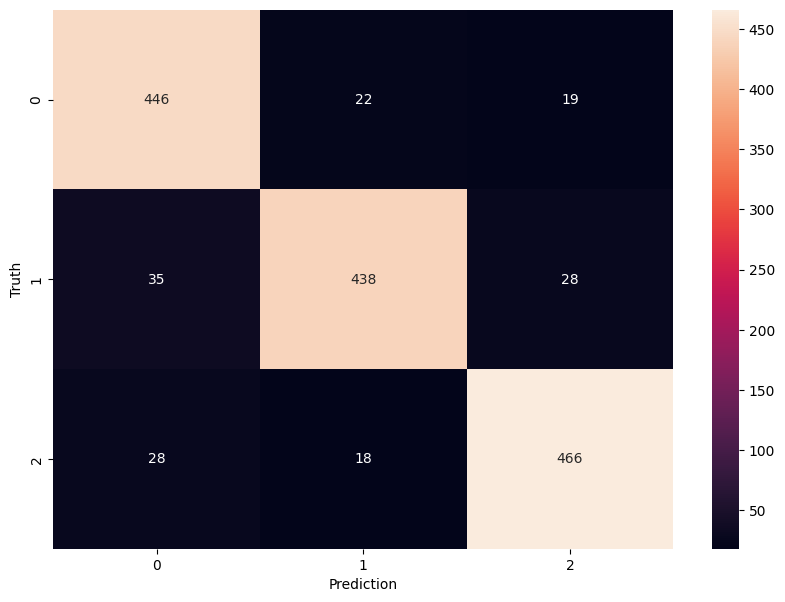

In [30]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')